Import dependencies

In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas

Read the data from Salary_Data.csv using pandas and convert the data to a numpy array

In [3]:
salaryData = pandas.read_csv("Salary_Data.csv")
x_train = salaryData["YearsExperience"].to_numpy()
y_train = salaryData["Salary"].to_numpy()

In [4]:
# hypothesis(x, w, b) returns the machine's guess of y given x, w, b
def hypothesis(x, w, b):
    return w * x + b

In [5]:
def calculateGradient(x_train, y_train, w, b):
    m = x_train.shape[0]
    d_dw = 0
    d_db = 0

    for i in range(m):
        d_dw += (hypothesis(x_train[i], w, b) - y_train[i]) * x_train[i]
        d_db += hypothesis(x_train[i], w, b) - y_train[i]
    
    d_dw /= m
    d_db /= m

    return d_dw, d_db

In [6]:
def gradientDescent(x_train, y_train, w, b, alpha, iter=10000):
    w_history = []
    b_history = []

    for i in range(iter):
        d_dw, d_db = calculateGradient(x_train, y_train, w, b)

        tempW = w - alpha * d_dw
        tempB = b - alpha * d_db

        w = tempW
        b = tempB

        if i % 20 == 0:
            w_history.append(w)
            b_history.append(b)
    
    return w, b, w_history, b_history

Text(0, 0.5, 'Salary')

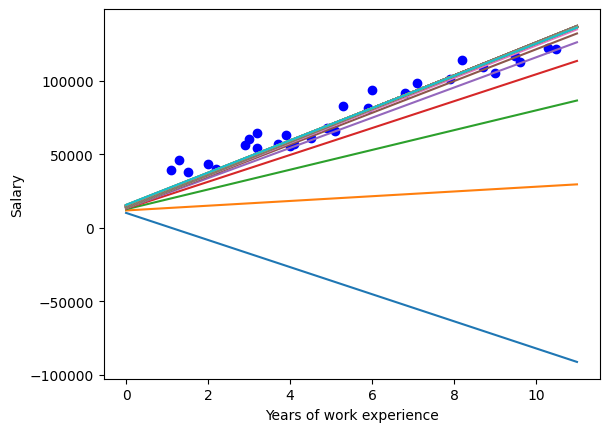

In [7]:
w_initial = -10000
b_initial = 10000
alpha = 0.001

x_range = np.linspace(0, 11)

w, b, w_history, b_history = gradientDescent(x_train, y_train, w_initial, b_initial, alpha, 1000)

plt.scatter(x_train, y_train, c='b')

# for i in range(len(w_history) - 1):
#     plt.plot(x_range, x_range * w_history[i] + b_history[i])

plt.plot(x_range, x_range * w + b)
plt.xlabel('Years of work experience')
plt.ylabel('Salary')

In [8]:
# PREDICTIONS
def predictSalary(s):
    print(f"Your salary with {s} years of work experience is ${round(hypothesis(s, w, b), 2)}!")

predictSalary(1.1)
predictSalary(11)

Your salary with 1.1 years of work experience is $27635.34!
Your salary with 11 years of work experience is $136204.51!
